<h1 style="text-align:center;font-size:200%;;">Explorative Datenanalyse 📊</h1>

<form action="/action_page.php">
  <fieldset>
    <legend>Aufbau:</legend>
    
   <div class="card">
    <p class="card-text">Beschreibung des Aufbaus der EDA</p>
  
  </div>
</div>
    
  </fieldset>
</form>

#### Bibliotheken importieren:

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

<hr class="my-4">

#### Daten einlesen:

In [126]:
df_results = pd.read_csv('files/input/results.csv', encoding="utf-8")
df_shootouts = pd.read_csv('files/input/shootouts.csv', encoding="utf-8")
df_goalscorers = pd.read_csv('files/input/goalscorers.csv', encoding="utf-8")

<hr class="my-4">

#### Dateneinblick:

(Spalten, Datentypen, fehlende Werte / Null-Values, Statistiken)

In [127]:
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [128]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47126 entries, 0 to 47125
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47126 non-null  object 
 1   home_team   47111 non-null  object 
 2   away_team   47111 non-null  object 
 3   home_score  47075 non-null  float64
 4   away_score  47075 non-null  float64
 5   tournament  47126 non-null  object 
 6   city        47126 non-null  object 
 7   country     47126 non-null  object 
 8   neutral     47126 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [129]:
df_results.isnull().sum()

date           0
home_team     15
away_team     15
home_score    51
away_score    51
tournament     0
city           0
country        0
neutral        0
dtype: int64

In [136]:
df_results.describe()

,home_score,away_score
count,47075.000000,47075.000000
mean,1.761190,1.183452
std,1.776751,1.402597
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [130]:
df_shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [131]:
df_shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           636 non-null    object
 1   home_team      636 non-null    object
 2   away_team      636 non-null    object
 3   winner         636 non-null    object
 4   first_shooter  222 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


In [132]:
df_shootouts.isnull().sum()

date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64

In [137]:
df_shootouts.describe()

,date,home_team,away_team,winner,first_shooter
count,636,636,636,636,222
unique,561,180,189,174,85
top,2024-03-26,South Africa,Egypt,South Korea,Colombia
freq,5,18,15,15,11


In [133]:
df_goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [134]:
df_goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44110 entries, 0 to 44109
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44110 non-null  object 
 1   home_team  44110 non-null  object 
 2   away_team  44110 non-null  object 
 3   team       44110 non-null  object 
 4   scorer     44060 non-null  object 
 5   minute     43847 non-null  float64
 6   own_goal   44108 non-null  object 
 7   penalty    44108 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.7+ MB


In [135]:
df_goalscorers.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        50
minute       263
own_goal       2
penalty        2
dtype: int64

In [138]:
df_goalscorers.describe()

,minute
count,43847.000000
mean,50.015212
std,26.354534
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


<hr class="my-4">

#### Datenaufbereitung:

# drop values, fill missing values, fillna, create new columns 

In [141]:
df_results["date"] = pd.to_datetime(df_results["date"])

In [140]:
# Kontinent-Mapping zum Erstellen einer neuen Spalte Kontinent für Heim- und Auswärtsteams

continents = {
    "Afghanistan": "Asia",
    "Egypt": "Africa",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Anguilla": "North America",
    "Antigua and Barbuda": "North America",
    "Equatorial Guinea": "Africa",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Aruba": "North America",
    "Azerbaijan": "Asia",
    "Ethiopia": "Africa",
    "Australia": "Oceania",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bermuda": "North America",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "Brunei Darussalam": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cayman Islands": "North America",
    "Chile": "South America",
    "China": "Asia",
    "Cook Islands": "Oceania",
    "Costa Rica": "North America",
    "Curaçao": "North America",
    "Denmark": "Europe",
    "Germany": "Europe",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "Djibouti": "Africa",
    "Ecuador": "South America",
    "El Salvador": "North America",
    "Ivory Coast": "Africa",
    "England": "Europe",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Faroe Islands": "Europe",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Ghana": "Africa",
    "Gibraltar": "Europe",
    "Grenada": "North America",
    "Greece": "Europe",
    "Guam": "Oceania",
    "Guatemala": "North America",
    "Guyana": "South America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hong Kong": "Asia",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iraq": "Asia",
    "Iran": "Asia",
    "Ireland": "Europe",
    "Iceland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Yemen": "Asia",
    "Jordan": "Asia",
    "U.S. Virgin Islands": "North America",
    "British Virgin Islands": "North America",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Kazakhstan": "Asia",
    "Qatar": "Asia",
    "Kenya": "Africa",
    "Kyrgyzstan": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Kosovo": "Europe",
    "Democratic Republic of the Congo": "Africa",
    "Republic of the Congo": "Africa",
    "North Korea": "Asia",
    "South Korea": "Asia",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Kuwait": "Asia",
    "Laos": "Asia",
    "Lesotho": "Africa",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macau": "Asia",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Morocco": "Africa",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Moldova": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Montserrat": "North America",
    "Mozambique": "Africa",
    "Myanmar": "Asia",
    "Namibia": "Africa",
    "Nepal": "Asia",
    "New Caledonia": "Oceania",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Netherlands": "Europe",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "Northern Ireland": "Europe",
    "North Macedonia": "Europe",
    "Norway": "Europe",
    "Oman": "Asia",
    "Austria": "Europe",
    "East Timor": "Asia",
    "Pakistan": "Asia",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Rwanda": "Africa",
    "Romania": "Europe",
    "Russia": "Europe",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Solomon Islands": "Oceania",
    "Zambia": "Africa",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Zimbabwe": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Somalia": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "South Africa": "Africa",
    "Sudan": "Africa",
    "South Sudan": "Africa",
    "Suriname": "South America",
    "Syria": "Asia",
    "Tajikistan": "Asia",
    "Tahiti": "Oceania",
    "Taiwan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Chad": "Africa",
    "Czech Republic": "Europe",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Turks and Caicos Islands": "North America",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "Hungary": "Europe",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Venezuela": "South America",
    "United Arab Emirates": "Asia",
    "United States": "North America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Central African Republic": "Africa",
    "Cyprus": "Asia"
}

df_results['home_continent'] = df_results['home_team'].map(continents)
df_results['away_continent'] = df_results['away_team'].map(continents)

df_results["home_continent"] = df_results["home_continent"].fillna("Country not in Fifa Ranking")
df_results["away_continent"] = df_results["away_continent"].fillna("Country not in Fifa Ranking")

In [78]:
#drop na-values
no_country_in_fifa_ranking_both = df_results[(df_results["home_continent"] == "Country not in Fifa Ranking") | (df_results["away_continent"] == "Country not in Fifa Ranking")]

df_results = df_results.drop(no_country_in_fifa_ranking_both.index)

In [79]:
#transform date column into date-object

#collect all games for the coming em 2024, because there aren't any results yet
df_em2024 = df_results[(df_results["tournament"] == "UEFA Euro") & (df_results["date"].dt.year == 2024)]
#drop em 2024 games
df_results = df_results.drop(df_em2024.index)

In [80]:
df_results["winning_country"] = df_results.apply(lambda x: x["home_team"] if x["home_score"] > x["away_score"] else "Unentschieden" if x["home_score"] == x["away_score"] else x["away_team"], axis=1)

In [81]:
df_results["winning_continent"] = df_results.apply(lambda x: x["home_continent"] if x["home_score"] > x["away_score"] else "Unentschieden" if x["home_score"] == x["away_score"] else x["away_continent"], axis=1)

In [82]:
df_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_continent,away_continent,winning_country,winning_continent
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Europe,Europe,Unentschieden,Unentschieden
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Europe,Europe,England,Europe
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Europe,Europe,Scotland,Europe
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Europe,Europe,Unentschieden,Unentschieden
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Europe,Europe,Scotland,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47070,2024-03-26,Scotland,Northern Ireland,0.0,1.0,Friendly,Glasgow,Scotland,False,Europe,Europe,Northern Ireland,Europe
47071,2024-03-26,Senegal,Benin,1.0,0.0,Friendly,Amiens,France,True,Africa,Africa,Senegal,Africa
47072,2024-03-26,Slovenia,Portugal,2.0,0.0,Friendly,Ljubljana,Slovenia,False,Europe,Europe,Slovenia,Europe
47073,2024-03-26,Spain,Brazil,3.0,3.0,Friendly,Madrid,Spain,False,Europe,South America,Unentschieden,Unentschieden


In [83]:
filtered_df = df_results[df_results['date'] == '2024-03-26']

# Ergebnis anzeigen
print(filtered_df)

            date                 home_team             away_team  home_score  \
47024 2024-03-26                   Algeria          South Africa         3.0   
47025 2024-03-26                     Egypt               Croatia         2.0   
47026 2024-03-26               New Zealand               Tunisia         0.0   
47027 2024-03-26                  Cambodia                Guyana         1.0   
47029 2024-03-26                 Lithuania             Gibraltar         1.0   
47030 2024-03-26                     Wales                Poland         0.0   
47031 2024-03-26                   Ukraine               Iceland         2.0   
47032 2024-03-26                   Georgia                Greece         0.0   
47033 2024-03-26                     India           Afghanistan         1.0   
47034 2024-03-26                    Kuwait                 Qatar         1.0   
47035 2024-03-26                     Syria               Myanmar         7.0   
47036 2024-03-26                  Thaila

In [84]:
df_shootouts['home_continent'] = df_shootouts['home_team'].map(continents)
df_shootouts['away_continent'] = df_shootouts['away_team'].map(continents)

In [85]:
df_shootouts["home_continent"] = df_shootouts["home_continent"].fillna("Country not in Fifa Ranking")
df_shootouts["away_continent"] = df_shootouts["away_continent"].fillna("Country not in Fifa Ranking")

In [86]:
no_country_in_fifa_ranking_both = df_shootouts[(df_shootouts["home_continent"] == "Country not in Fifa Ranking") | (df_shootouts["away_continent"] == "Country not in Fifa Ranking")]

df_shootouts = df_shootouts.drop(no_country_in_fifa_ranking_both.index)

In [87]:
winner_to_continent = df_shootouts['winner'].map(continents)

# Hinzufügen der Spalte winning_continent zum DataFrame
df_shootouts['winning_continent'] = winner_to_continent

In [88]:
df_shootouts["date"] = pd.to_datetime(df_shootouts["date"])

In [89]:
df_shootouts

,date,home_team,away_team,winner,first_shooter,home_continent,away_continent,winning_continent
0,1967-08-22,India,Taiwan,Taiwan,NaN,Asia,Asia,Asia
2,1972-05-07,South Korea,Iraq,Iraq,NaN,Asia,Asia,Asia
3,1972-05-17,Thailand,South Korea,South Korea,NaN,Asia,Asia,Asia
4,1972-05-19,Thailand,Cambodia,Thailand,NaN,Asia,Asia,Asia
5,1973-04-21,Senegal,Ghana,Ghana,NaN,Africa,Africa,Africa
...,...,...,...,...,...,...,...,...
630,2024-03-23,Tunisia,Croatia,Croatia,Croatia,Africa,Europe,Europe
631,2024-03-26,New Zealand,Tunisia,Tunisia,New Zealand,Oceania,Africa,Africa
632,2024-03-26,Wales,Poland,Poland,Poland,Europe,Europe,Europe
633,2024-03-26,Georgia,Greece,Georgia,Georgia,Asia,Europe,Asia


### Allgemeines

##### Allgemein:

Matches played by Year:
1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2020     329
2021    1058
2022     885
2023     903
2024     278
Name: year, Length: 153, dtype: int64


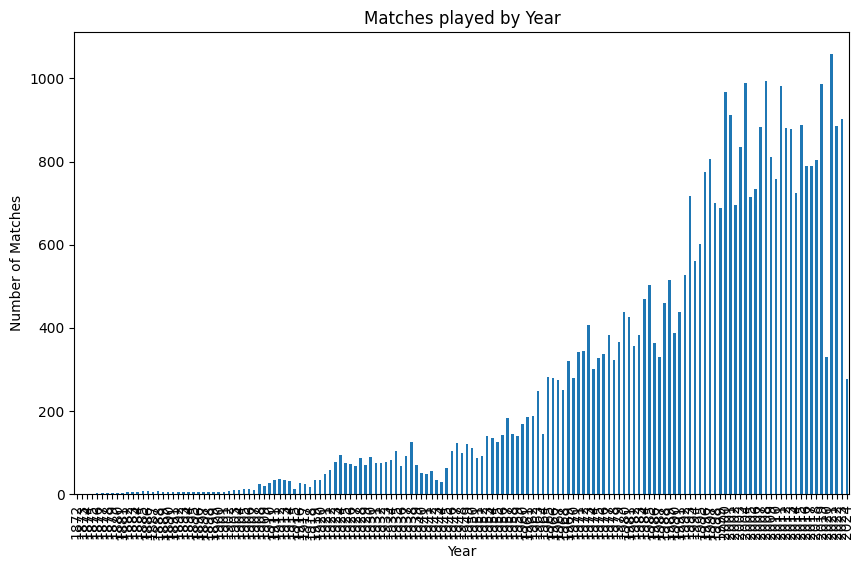

In [90]:
# Matches played by year

df_results['year'] = df_results['date'].dt.year

matches_per_year_results = df_results['year'].value_counts().sort_index()

print("Matches played by Year:")
print(matches_per_year_results)

plt.figure(figsize=(10, 6))
matches_per_year_results.plot(kind='bar')
plt.title('Matches played by Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

year
1872       0.0
1873       6.0
1874       3.0
1875       4.0
1876       7.0
         ...  
2020     819.0
2021    2917.0
2022    2180.0
2023    2490.0
2024     721.0
Name: total_goals, Length: 153, dtype: float64


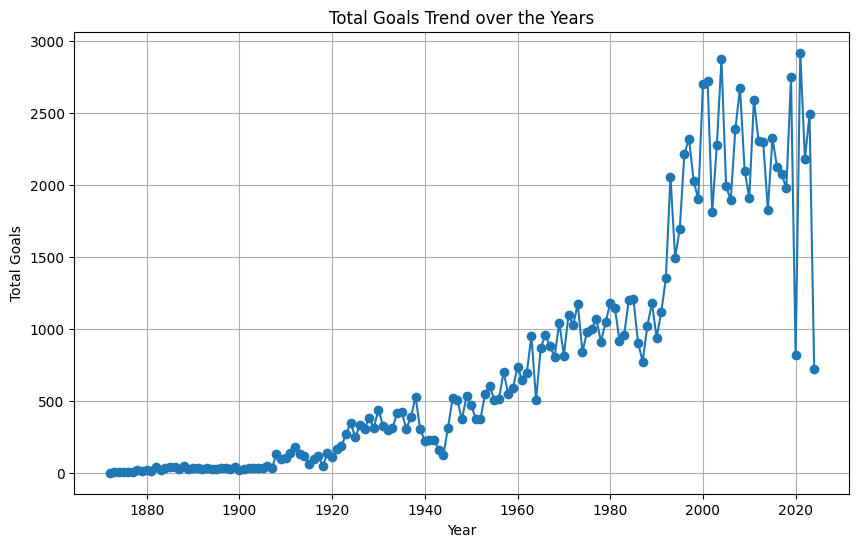

In [91]:
# Total Goals Trend over the years
df_results['total_goals'] = df_results['home_score'] + df_results['away_score']
goals_per_year_results = df_results.groupby('year')['total_goals'].sum()

print(goals_per_year_results)

plt.figure(figsize=(10, 6))
goals_per_year_results.plot(kind='line', marker='o')
plt.title('Total Goals Trend over the Years')
plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.grid(True)
plt.show()

In [92]:
# Wo werden die meisten gespielt? (Länder oder Kontinent)
matches_per_country = df_results.groupby('country')
matches_per_country_1 = df_results['country'].value_counts()
matches_per_continent = df_results['home_continent'].value_counts()

print(matches_per_country_1)
print(matches_per_continent)

United States                   1265
France                           713
Malaysia                         699
Qatar                            672
Thailand                         624
                                ... 
Manchuria                          1
Mali Federation                    1
German DR                          1
Portuguese Guinea                  1
United States Virgin Islands       1
Name: country, Length: 248, dtype: int64
Europe           12419
Asia              9587
Africa            8842
North America     5022
South America     3724
Oceania           1177
Name: home_continent, dtype: int64


In [93]:
# In welchen Spielminuten fallen die meisten Tore?

intervals = pd.interval_range(start=0, end=120, freq=5, closed='right')

# Erstelle eine neue Spalte 'Interval' im DataFrame, die die Intervalle enthält
df_goalscorers_minute = pd.cut(df_goalscorers['minute'], bins=intervals)

# Zähle die Anzahl der Tore in jedem Intervall
interval_counts_5 = df_goalscorers_minute.value_counts().sort_index()

# Ausgabe der Ergebnisse
print(interval_counts_5)

(0, 5]        1599
(5, 10]       1973
(10, 15]      2114
(15, 20]      2147
(20, 25]      2064
(25, 30]      2252
(30, 35]      2218
(35, 40]      2254
(40, 45]      2853
(45, 50]      2198
(50, 55]      2593
(55, 60]      2486
(60, 65]      2507
(65, 70]      2407
(70, 75]      2564
(75, 80]      2531
(80, 85]      2723
(85, 90]      4122
(90, 95]        43
(95, 100]       36
(100, 105]      53
(105, 110]      32
(110, 115]      34
(115, 120]      43
Name: minute, dtype: int64


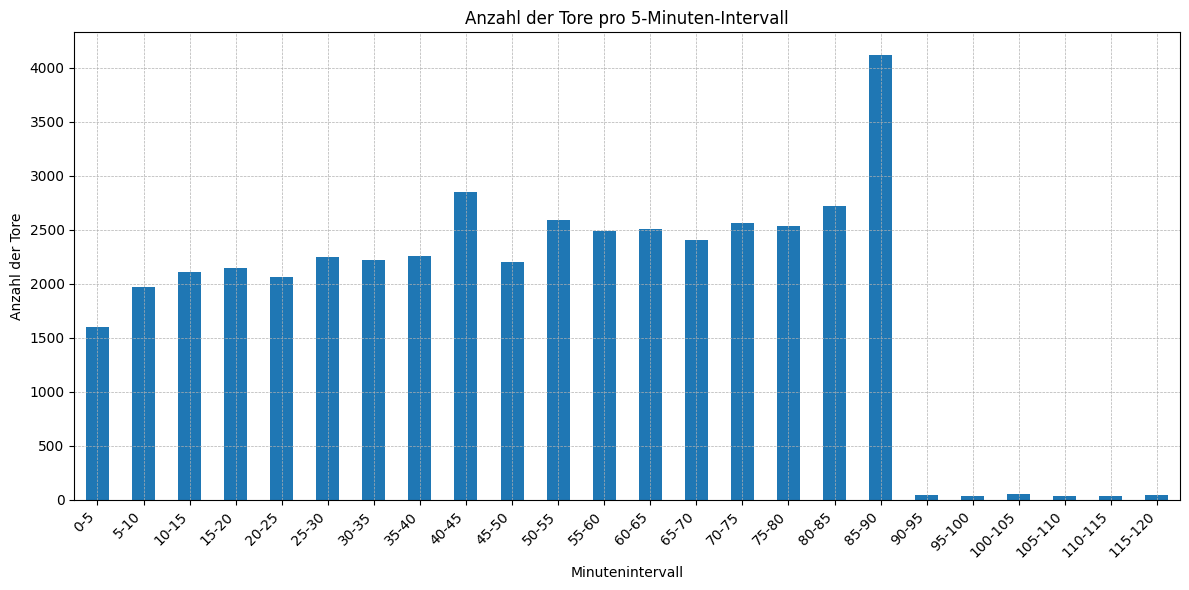

In [94]:
# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

# Balkendiagramm zeichnen
interval_counts_5.plot(kind='bar', ax=ax)

# Diagramm-Details hinzufügen
ax.set_title('Anzahl der Tore pro 5-Minuten-Intervall')
ax.set_xlabel('Minutenintervall')
ax.set_ylabel('Anzahl der Tore')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# X-Achsenbeschriftungen verbessern
ax.set_xticklabels([f'{int(interval.left)}-{int(interval.right)}' for interval in interval_counts_5.index], rotation=45, ha='right')

# Diagramm anzeigen
plt.tight_layout()
plt.show()

In [95]:
# Gewinnt man eher als Home oder away team?
df_results_home_away = df_results[df_results['home_team'] != df_results['away_team']]

# Anzahl der Heimsiege
home_wins = df_results_home_away[df_results_home_away['winning_country'] == df_results_home_away['home_team']].shape[0]

# Anzahl der Auswärtssiege
away_wins = df_results_home_away[df_results_home_away['winning_country'] == df_results_home_away['away_team']].shape[0]

print(f"Home wins: {home_wins}")
print(f"Away wins: {away_wins}")

Home wins: 19922
Away wins: 11435


In [96]:
# Wie viele Draws gibt es?
draws = df_results[df_results['winning_country'] == 'Unentschieden'].shape[0]

print(f"Draws: {draws}")

Draws: 9414


##### Turnierbezogenes:

In [97]:
# Welche Turniere gibt es?
tournaments = df_results['tournament'].unique()

print(tournaments)

['Friendly' 'British Home Championship' 'Évence Coppée Trophy'
 'Copa Lipton' 'Copa Newton' 'Copa Premio Honor Argentino'
 'Copa Premio Honor Uruguayo' 'Copa Roca' 'Copa América'
 'Far Eastern Championship Games' 'Copa Chevallier Boutell'
 'Olympic Games' 'Nordic Championship'
 'Central European International Cup' 'Baltic Cup'
 'Central American and Caribbean Games' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'Bolivarian Games'
 'CCCF Championship' 'NAFC Championship' 'Copa Oswaldo Cruz' 'Asian Games'
 'Pan American Championship' 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'Southeast Asian Peninsular Games'
 'African Friendship Games' 'Windward Islands Tournament'
 'African Cup of Nations qualification' 'Vietnam Independence Cup'
 'Copa Carlos Dittborn' 'Phillip Seaga Cup' 'CONCACAF Championshi

In [98]:
rs = pd.merge(df_results, df_shootouts, how = 'outer', on = ['date', 'home_team', 'away_team'])

In [99]:
rs.dropna(subset=['tournament'], inplace=True)

In [100]:
world_cup = rs.loc[rs['tournament'] == 'FIFA World Cup']
copa_america = rs.loc[rs['tournament'] == 'Copa América']
afcon = rs.loc[rs['tournament'] == 'African Cup of Nations']
euros = rs.loc[rs['tournament'] == 'UEFA Euro']
asian_cup = rs.loc[rs['tournament'] == 'AFC Asian Cup']

In [103]:

world_cup_goals = world_cup.groupby('year')[['home_score', 'away_score']].sum()
copa_america_goals = copa_america.groupby('year')[['home_score', 'away_score']].sum()
afcon_goals = afcon.groupby('year')[['home_score', 'away_score']].sum()
euros_goals = euros.groupby('year')[['home_score', 'away_score']].sum()
asian_cup_goals = asian_cup.groupby('year')[['home_score', 'away_score']].sum()

world_cup_goals['goals_scored'] = world_cup_goals['home_score'] + world_cup_goals['away_score']
copa_america_goals['goals_scored'] = copa_america_goals['home_score'] + copa_america_goals['away_score']
afcon_goals['goals_scored'] = afcon_goals['home_score'] + afcon_goals['away_score']
euros_goals['goals_scored'] = euros_goals['home_score'] + euros_goals['away_score']
asian_cup_goals['goals_scored'] = asian_cup_goals['home_score'] + asian_cup_goals['away_score']

In [104]:
# Distribution of penalty goals in matches 
df_goalscorers['own_goal'].value_counts()

False    43302
True       806
Name: own_goal, dtype: int64

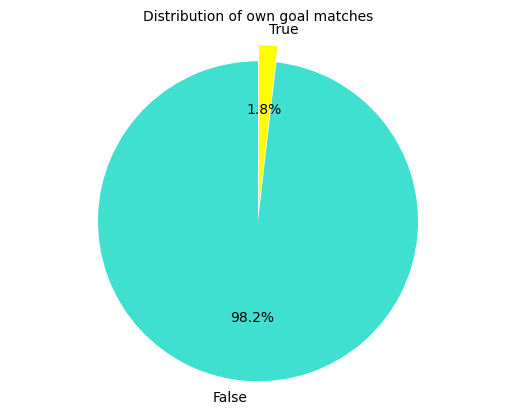

In [105]:
goals = df_goalscorers['own_goal'].value_counts()
plt.pie(goals.values, labels= goals.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['turquoise', 'yellow'])
plt.title('Distribution of own goal matches', size=10)
plt.axis('equal')
plt.show()

### Spieler

In [106]:
# Top Goalscorers in International Football 
top_scorers = df_goalscorers[df_goalscorers['own_goal'] == False].groupby('scorer').size().reset_index(name='goals')

In [107]:
top_scorers = top_scorers.sort_values(by='goals', ascending=False)

In [108]:
top_scorers

,scorer,goals
2521,Cristiano Ronaldo,111
10972,Robert Lewandowski,62
11165,Romelu Lukaku,61
4951,Harry Kane,55
7688,Lionel Messi,54
...,...,...
4135,Frank Seator,1
9004,Mohamed Dräger,1
9003,Mohamed Dellahi Yali,1
9002,Mohamed Daima,1


C:\Users\sophi\AppData\Local\Temp\ipykernel_15648\440126584.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(top_scorers['scorer'][:10], top_scorers['goals'][:10], color='skyblue')


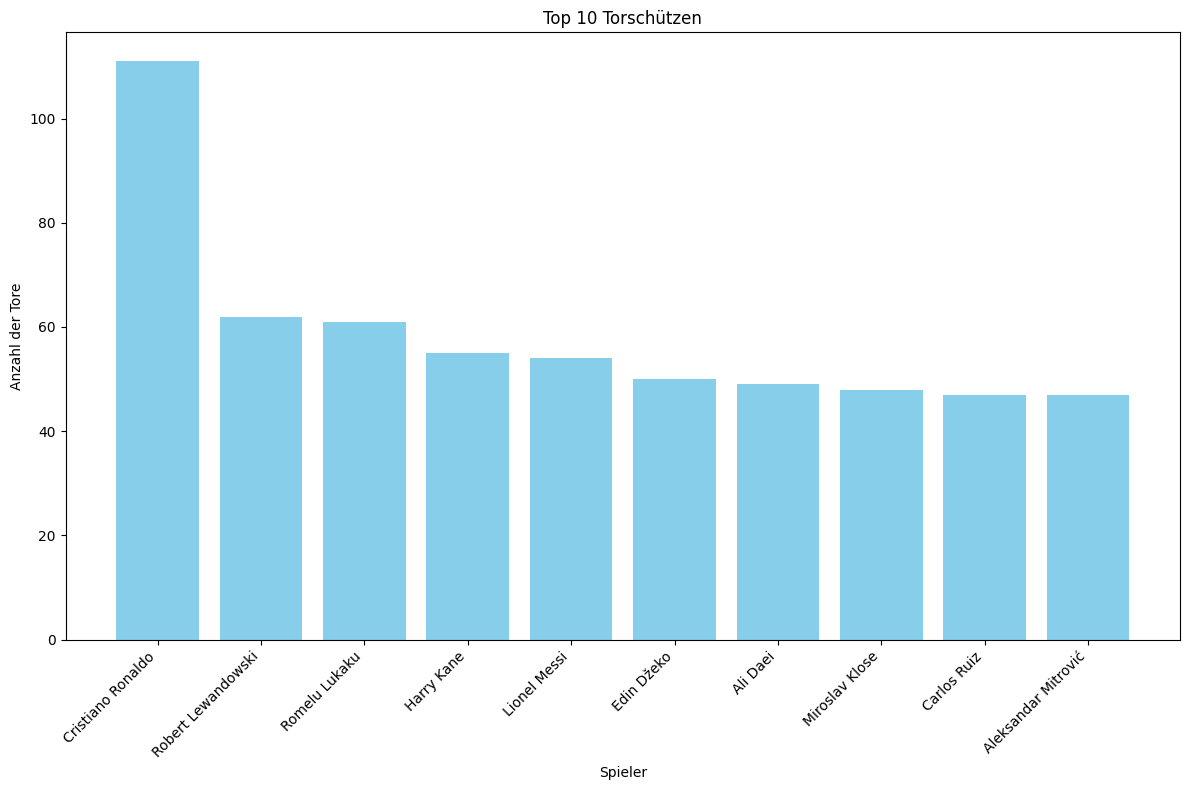

In [109]:
plt.figure(figsize=(12, 8))
plt.bar(top_scorers['scorer'][:10], top_scorers['goals'][:10], color='skyblue')
plt.xlabel('Spieler')
plt.ylabel('Anzahl der Tore')
plt.title('Top 10 Torschützen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Noch fehlerhaft

In [111]:
# Goals scored against favorite opponents by famous goalscoreres
df_scorers = df_goalscorers['scorer'].unique()

In [113]:
df_goalscorers['opponent'] = df_goalscorers.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = df_goalscorers.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh', 'Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']

top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

# Radar chart
fig = go.Figure()

for player in players:
    player_data = top_players_stats[top_players_stats['scorer'] == player]
    fig.add_trace(go.Scatterpolar(
        r=player_data['goals'],
        theta=player_data['opponent'],
        fill='toself',
        name=player
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(top_players_stats['goals']) + 1]
        )
    ),
    showlegend=True,
    title='Goals scored against favorite opponents by famous goalscorers'
)

fig.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_15648\2620839769.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'


In [114]:
df_goalscorers['opponent'] = df_goalscorers.apply(lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'], axis=1)

fav_opp = df_goalscorers.groupby(['scorer', 'opponent']).size().reset_index(name='goals')
fav_opp = fav_opp.loc[fav_opp.groupby('scorer')['goals'].idxmax()]

players = ['Lionel Messi', 'Romelu Lukaku', 'Cristiano Ronaldo', 'Robert Lewandowski', 'Neymar', 'Harry Kane', 'Diego Maradona', 'Kylian Mbappé',
           'Olivier Giroud', 'Thomas Müller', 'Pelé', 'Son Heung-min', 'Lê Công Vinh','Luis Suárez',
           'Edin Džeko', 'Miroslav Klose']
top_players_stats = fav_opp[fav_opp['scorer'].isin(players)]
top_players_stats['label'] = top_players_stats['opponent'] + ': ' + top_players_stats['goals'].astype(str) + ' goals'

fig = px.bar(top_players_stats, x='goals',
             y= 'scorer',
             color = 'goals',
             title = 'Goals scored against favorite opponents by famous goalscorers',
             text = 'label',
             orientation = 'h')
            
fig.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_15648\2011534026.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

